# Task 4

## Imports

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import seaborn as sns
#sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd

## Load dataset
Dataset from previous exercise is used

In [154]:
df = pd.read_csv('JO_pivoted.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'region', 'year', 'barley', 'energy forest',
       'fallow land',
       'field peas for cooking, fodder peas, vetches and field beans',
       'green fodder', 'green peas', 'horticulture plants',
       'ley for hay and forage plants', 'ley for seeds', 'mixed grain',
       'mixed grain and triticale', 'not utilized ley for hay and pasture',
       'oats', 'oil flax', 'other crops', 'other untilled arable land',
       'potatoes for processing of starch', 'rye', 'spring barley',
       'spring rape', 'spring turnip rape', 'spring wheat', 'sugar beets',
       'table potatoes', 'total arable land', 'triticale',
       'unspecified arable land', 'utilized ley for hay',
       'utilized ley for hay and pasture', 'utilized pasture', 'white beans',
       'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat'],
      dtype='object')


Unnamed: 0               region  year  barley  energy forest  \
0              0  0114 Upplands Väsby  1981   500.0            0.0   
1              1  0114 Upplands Väsby  1985   586.0            0.0   
2              2  0114 Upplands Väsby  1989   264.0            0.0   
3              3  0114 Upplands Väsby  1990   213.0            0.0   
4              4  0114 Upplands Väsby  1991   328.0            0.0   
...          ...                  ...   ...     ...            ...   
4055        4055          2584 Kiruna  1999     0.0            0.0   
4056        4056          2584 Kiruna  2001     0.0            0.0   
4057        4057          2584 Kiruna  2002     0.0            0.0   
4058        4058          2584 Kiruna  2003     0.0            0.0   
4059        4059          2584 Kiruna  2005     0.0            0.0   

      fallow land  \
0           179.0   
1            30.0   
2           124.0   
3            57.0   
4            91.0   
...           ...   
4055         17.0   
4056          0.0   
4057          5.0   
4058         15.0   
4059          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  ...  triticale  \
0             43.0         0.0                  0.0  ...        0.0   
1             63.0         0.0                  0.0  ...        0.0   
2              0.0         0.0                  0.0  ...        0.0   
3              2.0         0.0                  0.0  ...        0.0   
4              0.0         0.0                  0.0  ...        0.0   
...            ...         ...                  ...  ...        ...   
4055           1.0         0.0                  0.0  ...        0.0   
4056           0.0         0.0                  0.0  ...        0.0   
4057           0.0         0.0                  0.0  ...        0.0   
4058           0.0         0.0                  0.0  ...        0.0   
4059           0.0         0.0                  0.0  ...        0.0   

      unspecified arable land  utilized ley for hay  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   
...                       ...                   ...   
4055                      0.0                   0.0   
4056                    109.0                   0.0   
4057                     90.0                   0.0   
4058                     69.0                   0.0   
4059                     51.0                   0.0   

      utilized ley for hay and pasture  utilized pasture  white beans  \
0                                229.0               0.0          0.0   
1                                201.0               0.0          0.0   
2                                275.0               0.0          0.0   
3                                213.0               0.0          0.0   
4                                217.0               0.0          0.0   
...                                ...               ...          ...   
4055                             272.0        

## Regression
Lets look at linear and polynomial regression for the data, we will try to fit a line for "total arable land" per year, lets first split the data.

In [155]:
exclude_columns = ['Unnamed: 0', 'region', 'total arable land', 'barley']
target = 'barley'

X = df[[col for col in df.columns if col not in exclude_columns]]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression
Lets train the linear regression method for it

In [156]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Polynomial regression
Lets train the polynomial regression model for the same task

In [157]:
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

### Predictions and visualizing the results

Mean Squared Error: 546027.9521174212
R^2 Score: 0.8196851733152932


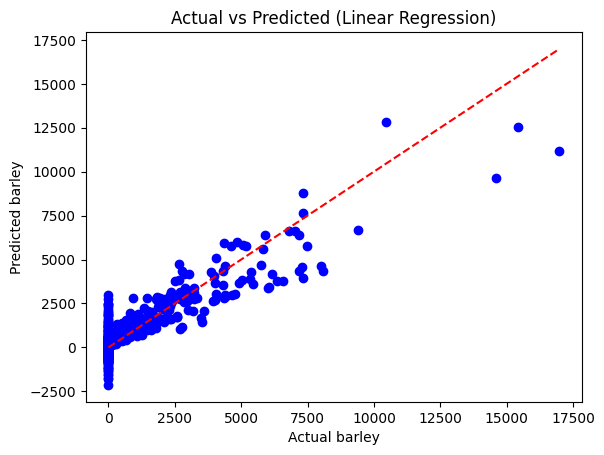

Polynomial Regression (degree = 2)
Mean Squared Error: 2442995.4346461706
R^2 Score: 0.19324954577595554


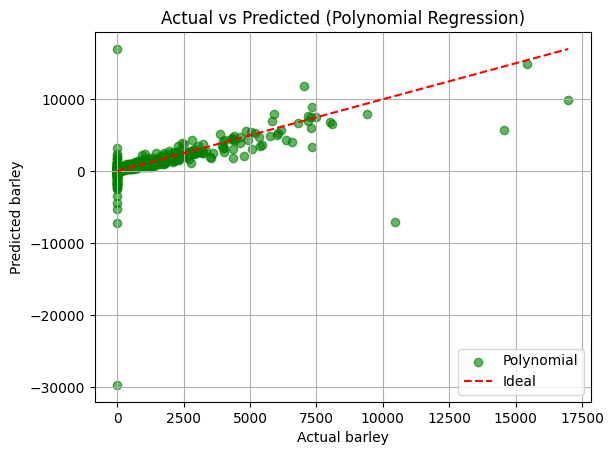

In [158]:
linear_y_pred = linear_model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, linear_y_pred))
print("R^2 Score:", r2_score(y_test, linear_y_pred))

plt.scatter(y_test, linear_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual barley')
plt.ylabel('Predicted barley')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()

poly_y_pred = poly_model.predict(X_test)
print("Polynomial Regression (degree = 2)")
print("Mean Squared Error:", mean_squared_error(y_test, poly_y_pred))
print("R^2 Score:", r2_score(y_test, poly_y_pred))

plt.scatter(y_test, poly_y_pred, color='green', alpha=0.6, label='Polynomial')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Actual barley')
plt.ylabel('Predicted barley')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()


## Clustering
Lets do clustering with k-Means and GMM, first lets prepare the data and select the features to cluster on. It would be interesting to see how much fallow land it is in relation to how much barley is grown. From the previous assignment, barley was produced in a pretty large amount.

In [159]:
cluster_features = ['barley', 'fallow land',]
cluster_df = df[cluster_features]

### k-Means
Lets cluster and visualize the results

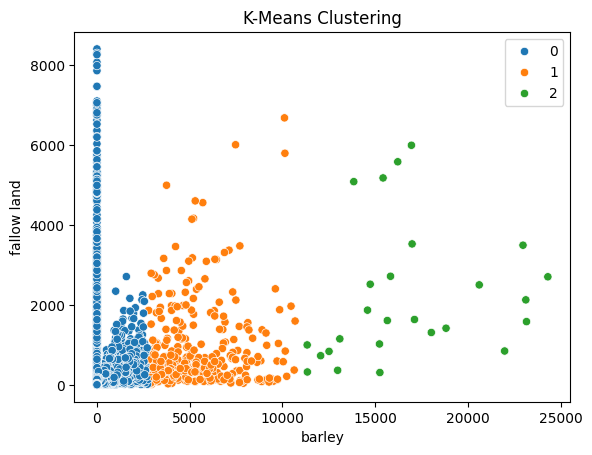

In [160]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(cluster_df)

sns.scatterplot(x=cluster_df[cluster_features[0]], y=cluster_df[cluster_features[1]], hue=y_kmeans, palette='tab10')
plt.title('K-Means Clustering')
plt.xlabel(cluster_features[0])
plt.ylabel(cluster_features[1])
plt.show()

### GMM
Lets run cluster and visualize the results

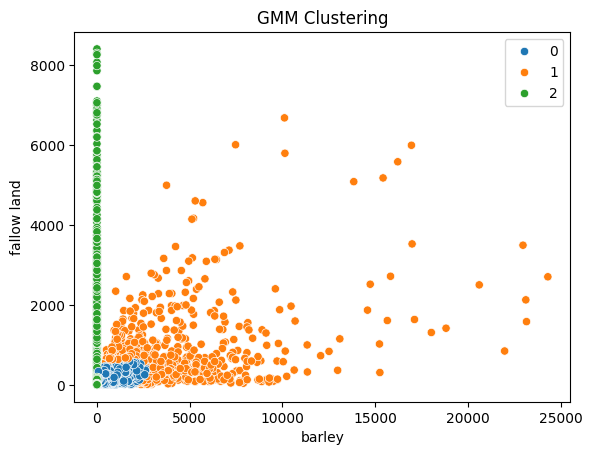

In [161]:
gmm = GMM(n_components=3, random_state=0)
y_gmm = gmm.fit_predict(cluster_df)

sns.scatterplot(x=cluster_df[cluster_features[0]], y=cluster_df[cluster_features[1]], hue=y_gmm, palette='tab10')
plt.title('GMM Clustering')
plt.xlabel(cluster_features[0])
plt.ylabel(cluster_features[1])
plt.show()


In [1]:
import pandas as pd

# Load dataset
### Dataset is from previous assignment, a nice and cleaned version

In [2]:
df = pd.read_csv('JO_pivoted.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'region', 'year', 'barley', 'energy forest',
       'fallow land',
       'field peas for cooking, fodder peas, vetches and field beans',
       'green fodder', 'green peas', 'horticulture plants',
       'ley for hay and forage plants', 'ley for seeds', 'mixed grain',
       'mixed grain and triticale', 'not utilized ley for hay and pasture',
       'oats', 'oil flax', 'other crops', 'other untilled arable land',
       'potatoes for processing of starch', 'rye', 'spring barley',
       'spring rape', 'spring turnip rape', 'spring wheat', 'sugar beets',
       'table potatoes', 'total arable land', 'triticale',
       'unspecified arable land', 'utilized ley for hay',
       'utilized ley for hay and pasture', 'utilized pasture', 'white beans',
       'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat'],
      dtype='object')


Unnamed: 0               region  year  barley  energy forest  \
0              0  0114 Upplands Väsby  1981   500.0            0.0   
1              1  0114 Upplands Väsby  1985   586.0            0.0   
2              2  0114 Upplands Väsby  1989   264.0            0.0   
3              3  0114 Upplands Väsby  1990   213.0            0.0   
4              4  0114 Upplands Väsby  1991   328.0            0.0   
...          ...                  ...   ...     ...            ...   
4055        4055          2584 Kiruna  1999     0.0            0.0   
4056        4056          2584 Kiruna  2001     0.0            0.0   
4057        4057          2584 Kiruna  2002     0.0            0.0   
4058        4058          2584 Kiruna  2003     0.0            0.0   
4059        4059          2584 Kiruna  2005     0.0            0.0   

      fallow land  \
0           179.0   
1            30.0   
2           124.0   
3            57.0   
4            91.0   
...           ...   
4055         17.0   
4056          0.0   
4057          5.0   
4058         15.0   
4059          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  ...  triticale  \
0             43.0         0.0                  0.0  ...        0.0   
1             63.0         0.0                  0.0  ...        0.0   
2              0.0         0.0                  0.0  ...        0.0   
3              2.0         0.0                  0.0  ...        0.0   
4              0.0         0.0                  0.0  ...        0.0   
...            ...         ...                  ...  ...        ...   
4055           1.0         0.0                  0.0  ...        0.0   
4056           0.0         0.0                  0.0  ...        0.0   
4057           0.0         0.0                  0.0  ...        0.0   
4058           0.0         0.0                  0.0  ...        0.0   
4059           0.0         0.0                  0.0  ...        0.0   

      unspecified arable land  utilized ley for hay  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   
...                       ...                   ...   
4055                      0.0                   0.0   
4056                    109.0                   0.0   
4057                     90.0                   0.0   
4058                     69.0                   0.0   
4059                     51.0                   0.0   

      utilized ley for hay and pasture  utilized pasture  white beans  \
0                                229.0               0.0          0.0   
1                                201.0               0.0          0.0   
2                                275.0               0.0          0.0   
3                                213.0               0.0          0.0   
4                                217.0               0.0          0.0   
...                                ...               ...          ...   
4055                             272.0        

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

region  year  barley  energy forest  fallow land  \
0     0114 Upplands Väsby  1981   500.0            0.0        179.0   
1     0114 Upplands Väsby  1985   586.0            0.0         30.0   
2     0114 Upplands Väsby  1989   264.0            0.0        124.0   
3     0114 Upplands Väsby  1990   213.0            0.0         57.0   
4     0114 Upplands Väsby  1991   328.0            0.0         91.0   
...                   ...   ...     ...            ...          ...   
4055          2584 Kiruna  1999     0.0            0.0         17.0   
4056          2584 Kiruna  2001     0.0            0.0          0.0   
4057          2584 Kiruna  2002     0.0            0.0          5.0   
4058          2584 Kiruna  2003     0.0            0.0         15.0   
4059          2584 Kiruna  2005     0.0            0.0          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  \
0             43.0         0.0                  0.0   
1             63.0         0.0                  0.0   
2              0.0         0.0                  0.0   
3              2.0         0.0                  0.0   
4              0.0         0.0                  0.0   
...            ...         ...                  ...   
4055           1.0         0.0                  0.0   
4056           0.0         0.0                  0.0   
4057           0.0         0.0                  0.0   
4058           0.0         0.0                  0.0   
4059           0.0         0.0                  0.0   

      ley for hay and forage plants  ...  triticale  unspecified arable land  \
0                               0.0  ...        0.0                      0.0   
1                               0.0  ...        0.0                      0.0   
2                               0.0  ...        0.0                      0.0   
3                               0.0  ...        0.0                      0.0   
4                               0.0  ...        0.0                      0.0   
...                             ...  ...        ...                      ...   
4055                            0.0  ...        0.0                      0.0   
4056                            0.0  ...        0.0                    109.0   
4057                            0.0  ...        0.0                     90.0   
4058                            0.0  ...        0.0                     69.0   
4059                            0.0  ...        0.0                     51.0   

      utilized ley for hay  utilized ley for hay and pasture  \
0                      0.0                             229.0   
1                      0.0                             201.0   
2                      0.0                             275.0   
3                      0.0                             213.0   
4                      0.0                             217.0   
...                    ...                               ...   
4055                   0.0                             272.0   
4056                   0.0                             151.0   
4057                   0.0                             140.0   
4058                   0.0                             143.0   

# Decision Tree Classifier

Let's make a decision tree to predict which region it is, based on all of the data

An 80/20 split on training and testing

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(["region"], axis=1)
y = df["region"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)


Train the tree on the train set, and make predictions on the test set

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1337)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['2417 Norsjö', '1444 Grästorp', '1384 Kungsbacka', '1880 Örebro',
       '0513 Kinda', '1275 Perstorp', '1480 Göteborg', '0680 Jönköping',
       '1783 Hagfors', '1486 Strömstad', '1383 Varberg', '1764 Grums',
       '1256 Östra Göinge', '1882 Askersund', '1214 Svalöv',
       '0682 Nässjö', '0662 Gislaved', '0120 Värmdö', '2132 Nordanstig',
       '1285 Eslöv', '0480 Nyköping', '1292 Ängelholm', '1060 Olofström',
       '1491 Ulricehamn', '1730 Eda', '1260 Bjuv', '2510 Jokkmokk',
       '2283 Sollefteå', '2083 Hedemora', '1283 Helsingborg',
       '0140 Nykvarn', '0162 Danderyd', '2034 Orsa', '1264 Skurup',
       '2581 Piteå', '1481 Mölndal', '0191 Sigtuna', '0764 Alvesta',
       '1470 Vara', '2184 Hudiksvall', '0486 Strängnäs', '1430 Munkedal',
       '1862 Degerfors', '1382 Falkenberg', '0120 Värmdö',
       '0483 Katrineholm', '0381 Enköping', '1485 Uddevalla',
       '0191 Sigtuna', '0834 Torsås', '1495 Skara', '1214 Svalöv',
       '2182 Söderhamn', '1419 Tjörn', '0834 T

## Validation metrics

Accuracy score

In [6]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_score(y_test, y_pred)

0.7068965517241379

F1 score

In [7]:
f1_score(y_test, y_pred, labels=clf.classes_, average=None, zero_division=0)

array([0.8       , 0.75      , 0.57142857, 0.85714286, 0.66666667,
       0.4       , 0.        , 0.85714286, 1.        , 0.75      ,
       0.22222222, 0.        , 0.18181818, 1.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5       , 1.        , 1.        ,
       0.5       , 0.        , 0.8       , 0.        , 0.8       ,
       1.        , 1.        , 1.        , 0.5       , 0.66666667,
       0.        , 0.66666667, 1.        , 0.        , 0.92307692,
       1.        , 0.57142857, 0.        , 1.        , 0.57142857,
       0.4       , 0.85714286, 0.66666667, 0.        , 0.        ,
       1.        , 1.        , 0.66666667, 0.88888889, 1.        ,
       0.8       , 1.        , 0.5       , 0.        , 1.        ,
       0.66666667, 0.5       , 0.75      , 0.75      , 1.        ,
       0.66666667, 0.85714286, 0.66666667, 0.66666667, 0.57142857,
       0.57142857, 1.        , 0.66666667, 1.        , 1.     

Raw absolute number of wrong predictions

In [8]:
(y_test != y_pred).sum()

np.int64(238)

Keep in mind that there are 290 municipalities, and each one has 14 datapoints (rows, 1 for each year) in the dataframe, so 238 might not be so bad after all

In [9]:
df["region"].nunique()

290

Let's do a confusion matrix.

<Axes: >

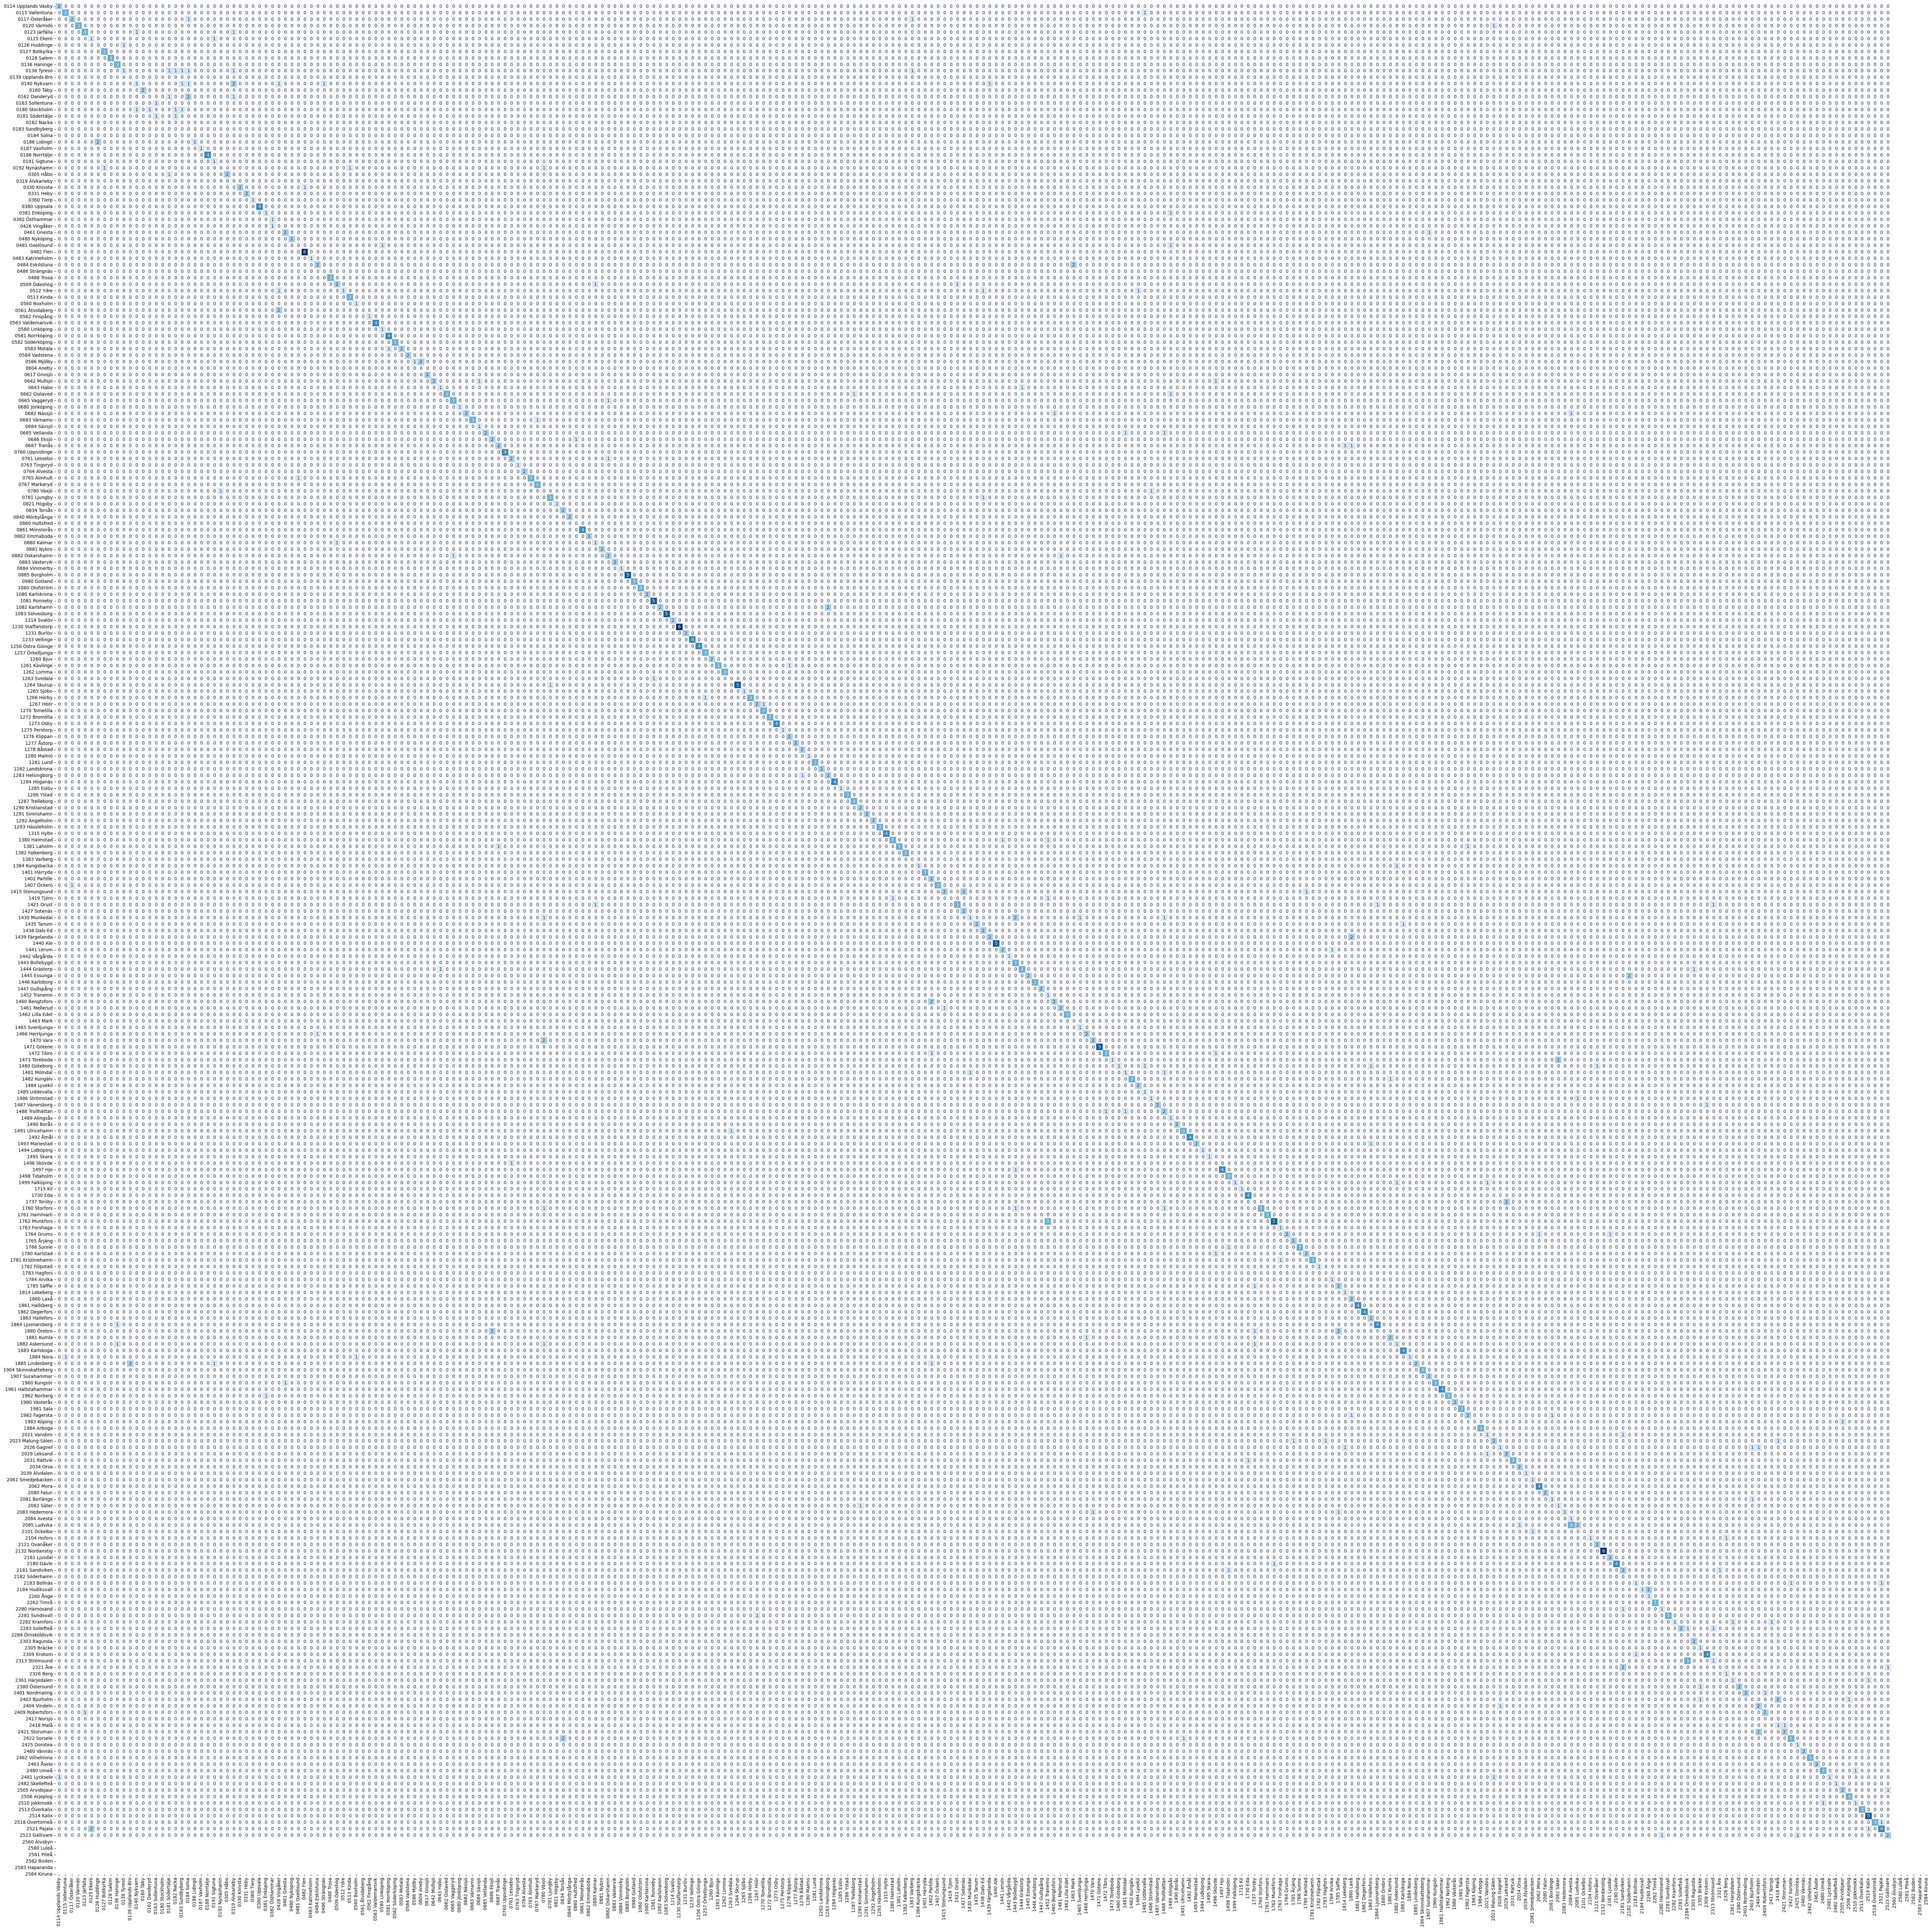

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(75, 75))
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=clf.classes_,
    yticklabels=clf.classes_,
    cmap="Blues",
)

Decision trees are easily interpretable, so let's print it! However, this tree is absolutely humongous, so is isn't exactly easy to see :(

[Text(0.9209092978457131, 0.9827586206896551, 'x[25] <= 72623.0\ngini = 0.996\nsamples = 3248\nvalue = [11.0, 10.0, 11.0, 11.0, 10.0, 11.0, 12.0, 10.0, 11.0\n9.0, 12.0, 12.0, 11.0, 12.0, 13.0, 12.0, 14.0, 14.0\n11.0, 11.0, 11.0, 9.0, 13.0, 13.0, 10.0, 11.0, 13.0\n12.0, 9.0, 12.0, 12.0, 13.0, 10.0, 12.0, 12.0, 10.0\n11.0, 12.0, 13.0, 7.0, 13.0, 11.0, 13.0, 11.0, 11.0\n13.0, 10.0, 12.0, 14.0, 14.0, 13.0, 10.0, 12.0, 9.0\n11.0, 12.0, 12.0, 13.0, 12.0, 12.0, 12.0, 12.0, 11.0\n10.0, 13.0, 12.0, 11.0, 12.0, 12.0, 10.0, 11.0, 10.0\n11.0, 13.0, 12.0, 11.0, 10.0, 8.0, 10.0, 13.0, 10.0\n12.0, 13.0, 10.0, 12.0, 11.0, 12.0, 10.0, 12.0, 13.0\n9.0, 11.0, 11.0, 12.0, 8.0, 12.0, 14.0, 9.0, 12.0\n8.0, 12.0, 10.0, 10.0, 10.0, 12.0, 11.0, 11.0, 13.0\n9.0, 13.0, 11.0, 11.0, 10.0, 14.0, 11.0, 10.0, 13.0\n11.0, 12.0, 11.0, 13.0, 11.0, 12.0, 10.0, 10.0, 13.0\n11.0, 10.0, 11.0, 12.0, 12.0, 11.0, 10.0, 10.0, 11.0\n11.0, 12.0, 13.0, 11.0, 8.0, 11.0, 11.0, 14.0, 10.0\n10.0, 12.0, 12.0, 10.0, 11.0, 9.0, 11.0, 13.

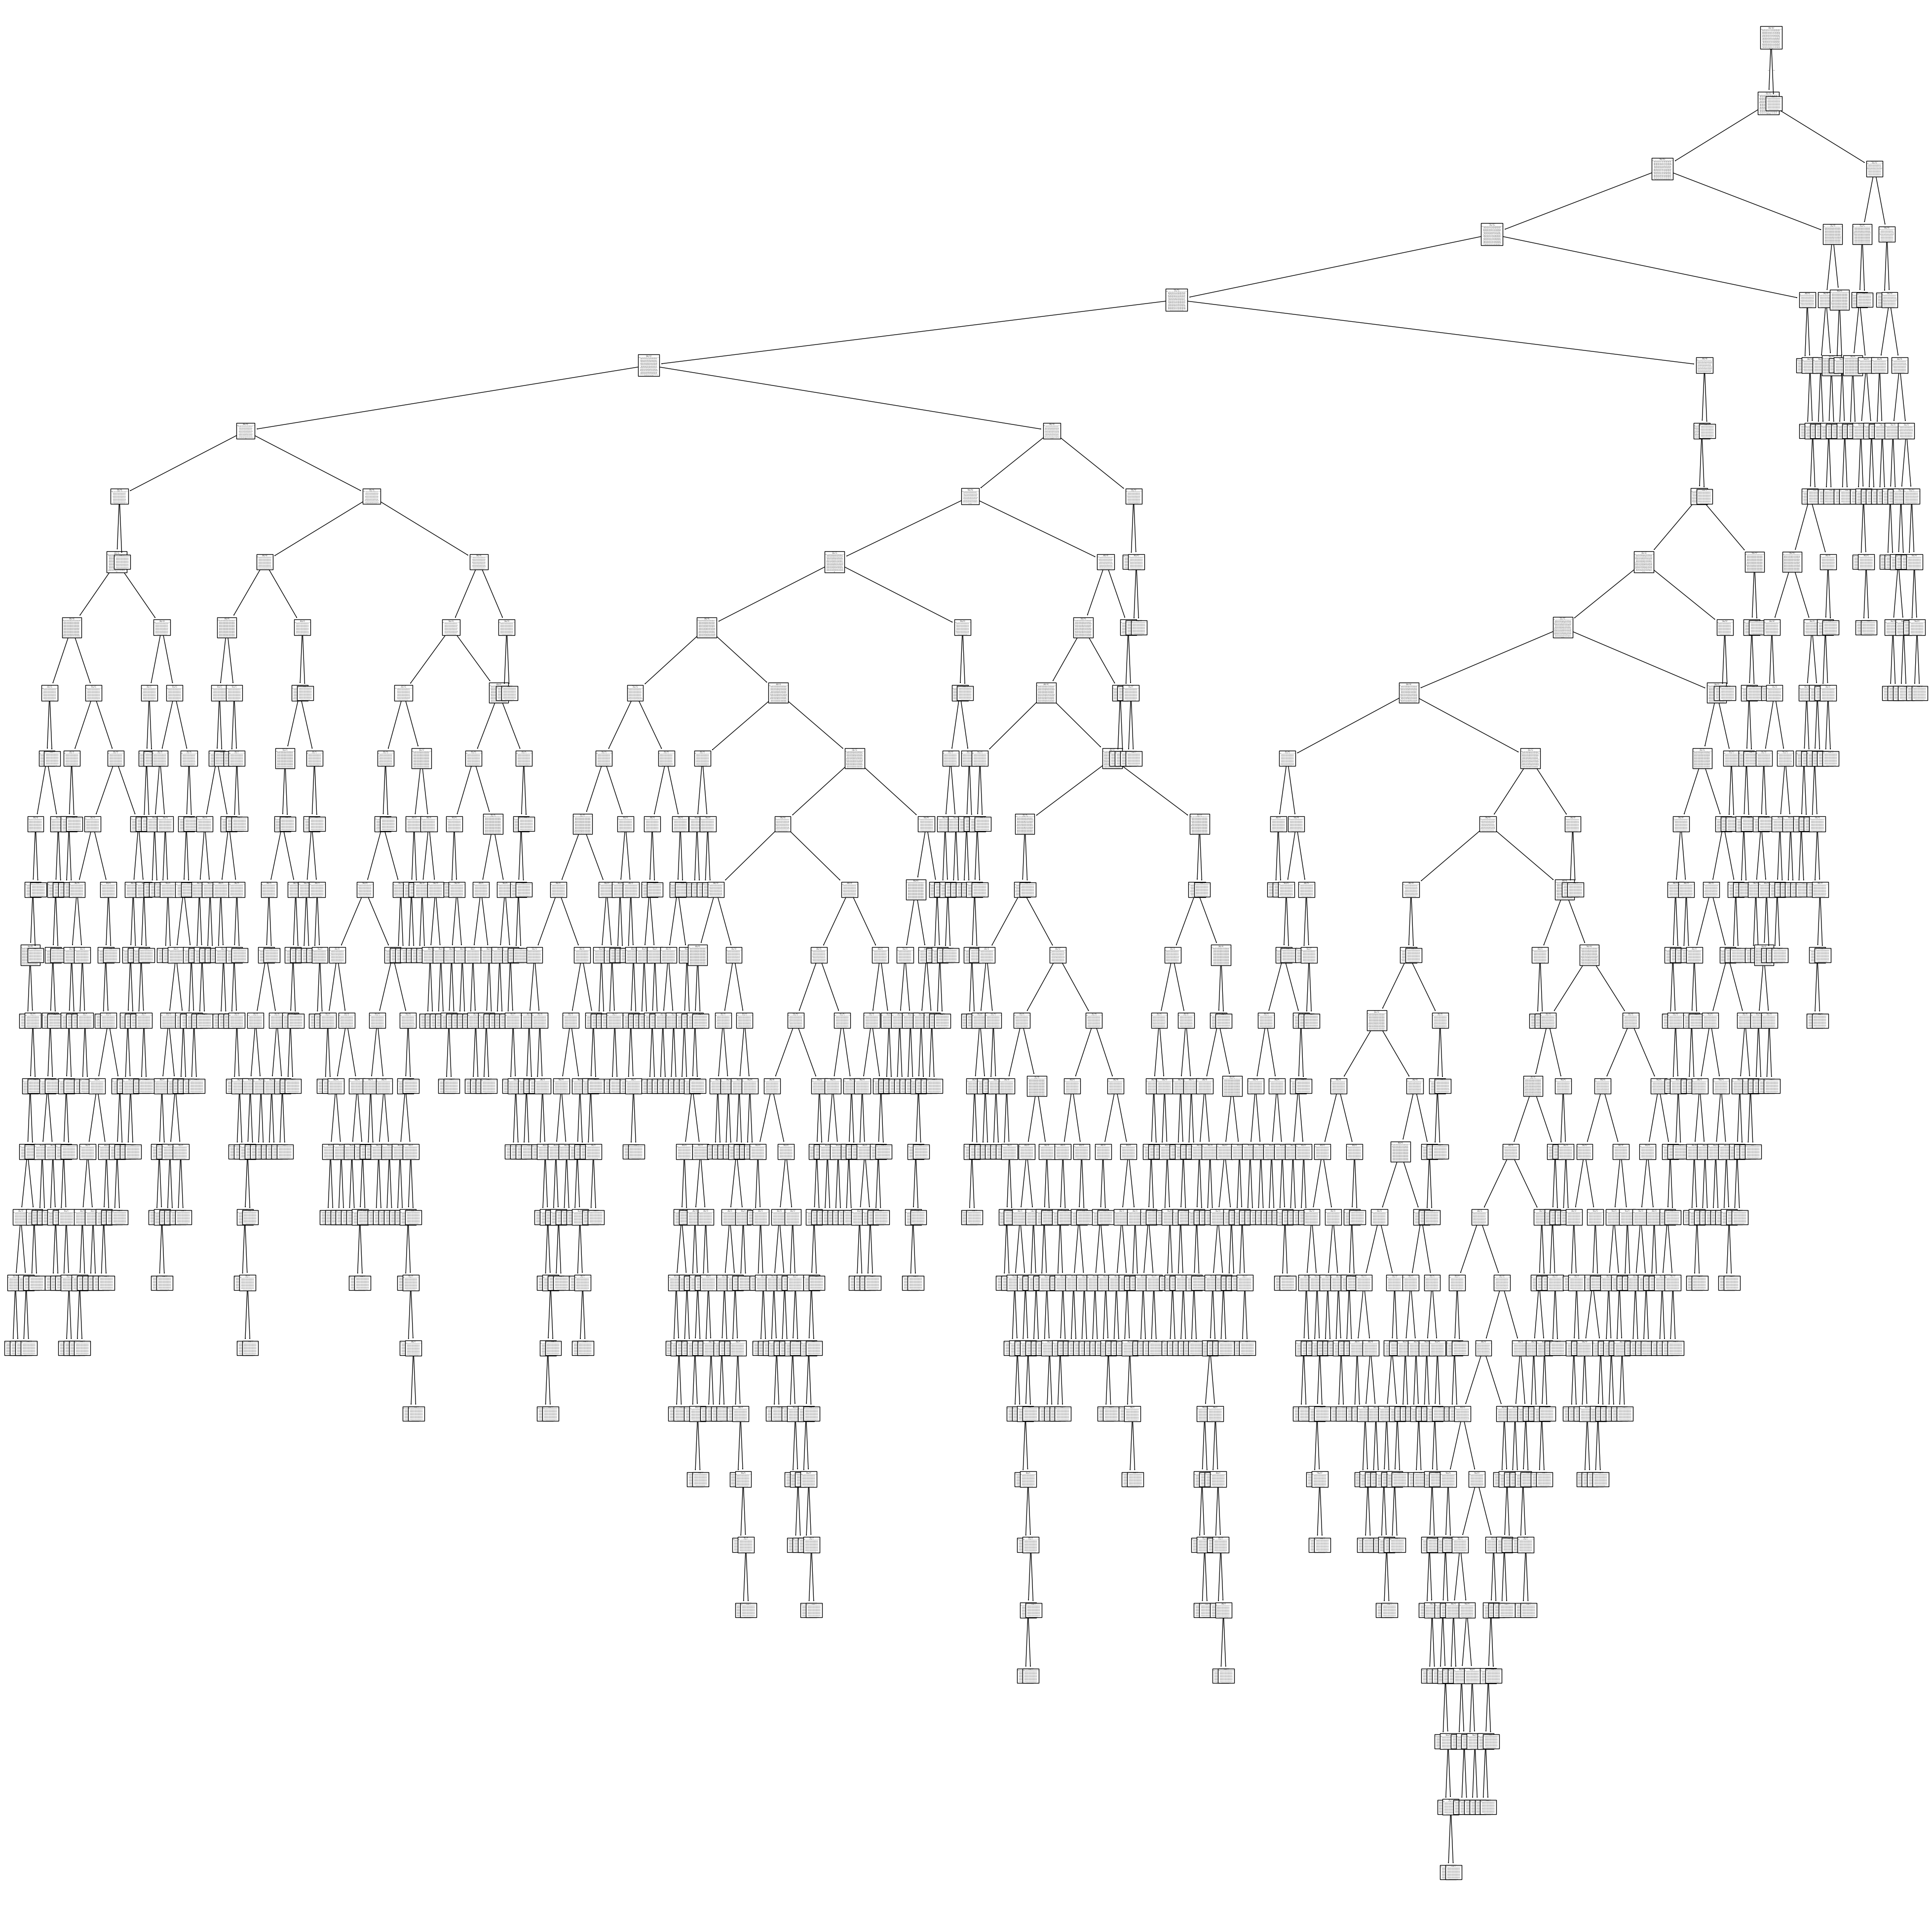

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 50))
plot_tree(clf)

# Exercise 4 continued
## SVMs, Hyperparameters, and Cross Validation

In [65]:
import sys
import sklearn as sk
import pandas as pd

Load the dataset

In [66]:
df = pd.read_csv("JO_pivoted.csv")
name = df.columns[0]
df = df.drop(name, axis=1)
df

region  year  barley  energy forest  fallow land  \
0     0114 Upplands Väsby  1981   500.0            0.0        179.0   
1     0114 Upplands Väsby  1985   586.0            0.0         30.0   
2     0114 Upplands Väsby  1989   264.0            0.0        124.0   
3     0114 Upplands Väsby  1990   213.0            0.0         57.0   
4     0114 Upplands Väsby  1991   328.0            0.0         91.0   
...                   ...   ...     ...            ...          ...   
4055          2584 Kiruna  1999     0.0            0.0         17.0   
4056          2584 Kiruna  2001     0.0            0.0          0.0   
4057          2584 Kiruna  2002     0.0            0.0          5.0   
4058          2584 Kiruna  2003     0.0            0.0         15.0   
4059          2584 Kiruna  2005     0.0            0.0          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  \
0             43.0         0.0                  0.0   
1             63.0         0.0                  0.0   
2              0.0         0.0                  0.0   
3              2.0         0.0                  0.0   
4              0.0         0.0                  0.0   
...            ...         ...                  ...   
4055           1.0         0.0                  0.0   
4056           0.0         0.0                  0.0   
4057           0.0         0.0                  0.0   
4058           0.0         0.0                  0.0   
4059           0.0         0.0                  0.0   

      ley for hay and forage plants  ...  triticale  unspecified arable land  \
0                               0.0  ...        0.0                      0.0   
1                               0.0  ...        0.0                      0.0   
2                               0.0  ...        0.0                      0.0   
3                               0.0  ...        0.0                      0.0   
4                               0.0  ...        0.0                      0.0   
...                             ...  ...        ...                      ...   
4055                            0.0  ...        0.0                      0.0   
4056                            0.0  ...        0.0                    109.0   
4057                            0.0  ...        0.0                     90.0   
4058                            0.0  ...        0.0                     69.0   
4059                            0.0  ...        0.0                     51.0   

      utilized ley for hay  utilized ley for hay and pasture  \
0                      0.0                             229.0   
1                      0.0                             201.0   
2                      0.0                             275.0   
3                      0.0                             213.0   
4                      0.0                             217.0   
...                    ...                               ...   
4055                   0.0                             272.0   
4056                   0.0                             151.0   
4057                   0.0                             140.0   
4058                   0.0                             143.0   

### SVMs

In [67]:
import sklearn.svm as svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

Build SVM pipelines for two approaches.

Regression on target="barley"

In [68]:
# perform regression SVM modeling on dataset
exclude = ["barley", "region", "total arable land"]
X_reg = df.drop(columns=exclude)
y_reg = df["barley"]

X_train_reg, X_test, y_train_reg, y_test = sk.model_selection.train_test_split(X_reg, y_reg, test_size=0.2)
svm_models_reg = {
    "SVR with linear kernel": Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', svm.SVR(C=1.0, kernel="linear"))
    ]),
    "SVR with poly kernel": Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', svm.SVR(C=1.0, kernel="poly"))
    ]),
    "SVR with rbf kernel": Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', svm.SVR(C=1.0, kernel="rbf"))
    ]),
}
results_reg = {}
for name, model in svm_models_reg.items():
    sys.stdout.write(f"\rTraining {name}..."); sys.stdout.flush()
    model.fit(X_train_reg, y_train_reg)
    sys.stdout.write(f"\rRunning inference for {name}..."); sys.stdout.flush()
    score = model.score(X_test, y_test)
    results_reg[name] = score
    print(f"\r[✓] {name} - R² Score: {score:.2f}")

results_df = pd.DataFrame.from_dict(results_reg, orient="index", columns=["R² Score"])
results_df = results_df.reset_index().rename(columns={"index": "Model"})
results_df

Training SVR with linear kernel...

[✓] SVR with linear kernel - R² Score: -0.09...
[✓] SVR with poly kernel - R² Score: 0.09l...
[✓] SVR with rbf kernel - R² Score: -0.11...


Model  R² Score
0  SVR with linear kernel -0.093847
1    SVR with poly kernel  0.089414
2     SVR with rbf kernel -0.105294

Classification on target="region"

In [69]:
# perform classification SVM modeling on dataset

exclude = ["region", "total arable land"]
X_clf = df.drop(columns=exclude)
y_clf = df["region"]

X_train_clf, X_test, y_train_clf, y_test = sk.model_selection.train_test_split(X_clf, y_clf, test_size=0.2)
svm_models_clf = {
    "SVC with linear kernel": Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', svm.SVC(C=1.0, kernel="linear"))
    ]),
    "SVC with poly kernel": Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', svm.SVC(C=1.0, kernel="poly"))
    ]),
    "SVC with rbf kernel": Pipeline([
        ('scaler', MinMaxScaler()),
        ('svr', svm.SVC(C=1.0, kernel="rbf"))
    ]),
}
results_clf = {}
for name, model in svm_models_clf.items():
    sys.stdout.write(f"\rTraining {name}..."); sys.stdout.flush()
    model.fit(X_train_clf, y_train_clf)
    sys.stdout.write(f"\rRunning inference for {name}..."); sys.stdout.flush()
    score = model.score(X_test, y_test)
    results_clf[name] = score
    print(f"\r[✓] {name} - Accuracy: {score:.2f}")

results_df = pd.DataFrame.from_dict(results_clf, orient="index", columns=["Accuracy"])
results_df = results_df.reset_index().rename(columns={"index": "Model"})
results_df

[✓] SVC with linear kernel - Accuracy: 0.10l...
[✓] SVC with poly kernel - Accuracy: 0.18l...
[✓] SVC with rbf kernel - Accuracy: 0.14l...


Model  Accuracy
0  SVC with linear kernel  0.098522
1    SVC with poly kernel  0.184729
2     SVC with rbf kernel  0.139163

### 10-fold Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

Perform 10 fold cross validation on both regression and classification approach

Regression on target="barley"

In [71]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results_reg = {}

for name, model in svm_models_reg.items():
    sys.stdout.write(f"Cross-validating {name}..."); sys.stdout.flush()
    scores = cross_val_score(model, X_reg, y_reg, cv=cv, scoring='r2', n_jobs=-1)
    results_reg[name] = np.mean(scores)
    print(f"\r[✓] {name} - Mean R² Score: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

results_df = pd.DataFrame.from_dict(results_reg, orient="index", columns=["R² Score"])
results_df = results_df.reset_index().rename(columns={"index": "Model"})
results_df

Cross-validating SVR with linear kernel...

[✓] SVR with linear kernel - Mean R² Score: -0.08 ± 0.01
[✓] SVR with poly kernel - Mean R² Score: 0.08 ± 0.06
[✓] SVR with rbf kernel - Mean R² Score: -0.09 ± 0.01


Model  R² Score
0  SVR with linear kernel -0.079093
1    SVR with poly kernel  0.081631
2     SVR with rbf kernel -0.086078

Classification on target="region"

In [72]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results_clf = {}

for name, model in svm_models_clf.items():
    sys.stdout.write(f"Cross-validating {name}..."); sys.stdout.flush()
    scores = cross_val_score(model, X_clf, y_clf, cv=cv, scoring='accuracy', n_jobs=-1)
    results_clf[name] = np.mean(scores)
    print(f"\r[✓] {name} - Mean Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

results_df = pd.DataFrame.from_dict(results_clf, orient="index", columns=["Accuracy"])
results_df = results_df.reset_index().rename(columns={"index": "Model"})
results_df

[✓] SVC with linear kernel - Mean Accuracy: 0.10 ± 0.01
[✓] SVC with poly kernel - Mean Accuracy: 0.19 ± 0.02
[✓] SVC with rbf kernel - Mean Accuracy: 0.16 ± 0.01


Model  Accuracy
0  SVC with linear kernel  0.104926
1    SVC with poly kernel  0.193842
2     SVC with rbf kernel  0.155911

### Grid Search
Kernels:
- Radial basis function kernel (RBF)
- Polynomial kernel 
- Linear kernel

Regularization params C:
- C=1
- C=10
- C=100

In [73]:
from sklearn.model_selection import GridSearchCV

Regression on target="barley"

In [74]:
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [1.0, 10.0, 100.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svr', svm.SVR())
])

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_reg, y_reg)

all_results_df = pd.DataFrame(grid.cv_results_)
display_columns = ['param_svr__kernel', 'param_svr__C', 'mean_test_score', 'rank_test_score']
all_results_df[display_columns].sort_values(by='rank_test_score')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


param_svr__kernel  param_svr__C  mean_test_score  rank_test_score
8              poly         100.0         0.674161                1
6            linear         100.0         0.640853                2
5              poly          10.0         0.471326                3
7               rbf         100.0         0.393702                4
3            linear          10.0         0.167299                5
4               rbf          10.0         0.093756                6
2              poly           1.0         0.071490                7
0            linear           1.0        -0.085131                8
1               rbf           1.0        -0.092416                9

Classification on target="region"

In [75]:
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__C': [1.0, 10.0, 100.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', svm.SVC())
])

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_clf, y_clf)

all_results_df = pd.DataFrame(grid.cv_results_)
display_columns = ['param_svc__kernel', 'param_svc__C', 'mean_test_score', 'rank_test_score']
all_results_df[display_columns].sort_values(by='rank_test_score')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


param_svc__kernel  param_svc__C  mean_test_score  rank_test_score
7               rbf         100.0         0.613054                1
6            linear         100.0         0.540394                2
8              poly         100.0         0.483990                3
4               rbf          10.0         0.369212                4
5              poly          10.0         0.337931                5
3            linear          10.0         0.283744                6
2              poly           1.0         0.188177                7
1               rbf           1.0         0.145320                8
0            linear           1.0         0.099507                9

In [1]:
import pandas as pd

# Load dataset
### Dataset is from previous assignment, a nice and cleaned version

In [2]:
df = pd.read_csv('JO_pivoted.csv')
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df

region  year  barley  energy forest  fallow land  \
0     0114 Upplands Väsby  1981   500.0            0.0        179.0   
1     0114 Upplands Väsby  1985   586.0            0.0         30.0   
2     0114 Upplands Väsby  1989   264.0            0.0        124.0   
3     0114 Upplands Väsby  1990   213.0            0.0         57.0   
4     0114 Upplands Väsby  1991   328.0            0.0         91.0   
...                   ...   ...     ...            ...          ...   
4055          2584 Kiruna  1999     0.0            0.0         17.0   
4056          2584 Kiruna  2001     0.0            0.0          0.0   
4057          2584 Kiruna  2002     0.0            0.0          5.0   
4058          2584 Kiruna  2003     0.0            0.0         15.0   
4059          2584 Kiruna  2005     0.0            0.0          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  \
0             43.0         0.0                  0.0   
1             63.0         0.0                  0.0   
2              0.0         0.0                  0.0   
3              2.0         0.0                  0.0   
4              0.0         0.0                  0.0   
...            ...         ...                  ...   
4055           1.0         0.0                  0.0   
4056           0.0         0.0                  0.0   
4057           0.0         0.0                  0.0   
4058           0.0         0.0                  0.0   
4059           0.0         0.0                  0.0   

      ley for hay and forage plants  ...  triticale  unspecified arable land  \
0                               0.0  ...        0.0                      0.0   
1                               0.0  ...        0.0                      0.0   
2                               0.0  ...        0.0                      0.0   
3                               0.0  ...        0.0                      0.0   
4                               0.0  ...        0.0                      0.0   
...                             ...  ...        ...                      ...   
4055                            0.0  ...        0.0                      0.0   
4056                            0.0  ...        0.0                    109.0   
4057                            0.0  ...        0.0                     90.0   
4058                            0.0  ...        0.0                     69.0   
4059                            0.0  ...        0.0                     51.0   

      utilized ley for hay  utilized ley for hay and pasture  \
0                      0.0                             229.0   
1                      0.0                             201.0   
2                      0.0                             275.0   
3                      0.0                             213.0   
4                      0.0                             217.0   
...                    ...                               ...   
4055                   0.0                             272.0   
4056                   0.0                             151.0   
4057                   0.0                             140.0   
4058                   0.0                             143.0   

# Feature Importance

Not all features are guaranteed to be useful for a model, let's find out which ones matters the most (and the least!).

This will be the same Decision Tree Classifier model as before.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(["region"], axis=1)
y = df["region"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

clf = DecisionTreeClassifier(random_state=1337)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7068965517241379

The base model is done, so let's get to work on feature importance

In [4]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(clf, X_test, y_test, n_repeats=50, random_state=1337)
df_fi = pd.DataFrame([X.columns, pi['importances_mean']]).T.set_index(0)
df_fi.sort_values(by=1, ascending=False, inplace=True)
df_fi

1
0                                                           
total arable land                                   0.652808
table potatoes                                      0.304778
oats                                                0.291034
winter wheat                                        0.179286
sugar beets                                         0.145517
ley for seeds                                       0.078695
potatoes for processing of starch                   0.074532
fallow land                                         0.057709
spring rape                                         0.055764
utilized ley for hay and pasture                    0.037956
spring wheat                                        0.031084
other crops                                         0.029064
rye                                                 0.025936
winter rape                                             0.02
spring turnip rape                                  0.016724
spring barley                                       0.014261
green fodder                                        0.011527
triticale                                           0.009064
mixed grain                                         0.009039
field peas for cooking, fodder peas, vetches an...  0.008202
other untilled arable land                          0.005591
not utilized ley for hay and pasture                0.005222
unspecified arable land                             0.004557
winter barley                                       0.003374
ley for hay and forage plants                       0.003079
barley                                              0.002512
winter turnip rape                                  0.001798
energy forest                                       0.001576
horticulture plants                                 0.001232
oil flax                                            0.000468
mixed grain and triticale                           0.000468
utilized pasture                                    0.000443
green peas                                               0.0
utilized ley for hay                                     0.0
white beans                                              0.0
year                                               -0.000764

Not suprisingly, the total arable land is highly telling of which region it is. Interestingly, the 'year' feature is so bad it went beyond unimportant, it is actively hurting the performance of the model.

Let's train a model on the two best features and see how it does.

In [5]:
feats = ["total arable land", "table potatoes"]
X_train, X_test = X_train[feats], X_test[feats]
clf.fit(X_train, y_train)
y_pred_good = clf.predict(X_test)
accuracy_score(y_pred_good, y_test)

0.43349753694581283

So it got significantly worse with only 2 features, but still, 43% accuracy on 290 classes is pretty good.

Let's do the same, but with the worst 2 features. Since the place for 2nd worse feature is three-way tied, let's just select one of them arbitrarily.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1337)
feats = ["year", "green peas"]
X_train, X_test = X_train[feats], X_test[feats]
clf.fit(X_train, y_train)
y_pred_bad = clf.predict(X_test)
accuracy_score(y_pred_bad, y_test)

0.0012315270935960591

Suprise suprise, training the model on the worst 2 features yielded an accuracy that is literally worse than random guess.

In [7]:
print(1/290)

0.0034482758620689655


Just for fun, let's train on the 2 median features and see how it does.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1337)
feats = ["triticale", "mixed grain"]
X_train, X_test = X_train[feats], X_test[feats]
clf.fit(X_train, y_train)
y_pred_bad = clf.predict(X_test)
accuracy_score(y_pred_bad, y_test)

0.020935960591133004

Obviously not nearly as good as the top 2 fatures, but it is significantly better than random guess.

What about guessing on majority class? Let's do some code magic to see what the accuracy is when just making fixed guesses for what region it is.

In [9]:
value_counts = y_train.value_counts()

value_counts_df = pd.DataFrame({
    'Region': value_counts.index,
    'Count': value_counts.values
})

value_counts_df

Region  Count
0         1276 Klippan     14
1           1435 Tanum     14
2        0562 Finspång     14
3    1230 Staffanstorp     14
4            1884 Nora     14
..                 ...    ...
285  1864 Ljusnarsberg      8
286         2262 Timrå      8
287   0483 Katrineholm      7
288         2580 Luleå      7
289     1447 Gullspång      7

[290 rows x 2 columns]

In [10]:
results_list = []

for index, row in value_counts_df.iterrows():
    region = row["Region"]
    count = row["Count"]
    
    y_majority = [region] * len(y_test)
    acc = accuracy_score(y_majority, y_test)

    results_list.append({
        'Region': region,
        'Accuracy': acc
    })

results_df = pd.DataFrame(results_list)

merged_df = pd.merge(value_counts_df, results_df, on="Region")
merged_df.head(20)

Region  Count  Accuracy
0        1276 Klippan     14  0.000000
1          1435 Tanum     14  0.000000
2       0562 Finspång     14  0.000000
3   1230 Staffanstorp     14  0.000000
4           1884 Nora     14  0.000000
5   0563 Valdemarsvik     14  0.000000
6         2584 Kiruna     14  0.000000
7        2161 Ljusdal     14  0.000000
8     0181 Södertälje     14  0.000000
9           2260 Ånge     14  0.000000
10     0180 Stockholm     14  0.000000
11        2026 Gagnef     14  0.000000
12         2180 Gävle     13  0.001232
13         0488 Trosa     13  0.001232
14     1270 Tomelilla     13  0.001232
15    1291 Simrishamn     13  0.001232
16        0617 Gnosjö     13  0.001232
17         0513 Kinda     13  0.001232
18       1960 Kungsör     13  0.001232
19       0980 Gotland     13  0.001232

Turns out that all of the majority classes results in exactly 0% accuracy. It isn't until the 2nd majority classes that the accuracy is above 0.

# Statistical Testing

General imports

In [54]:
import pandas as pd
import numpy as np

Load the dataset

In [55]:
df = pd.read_csv("JO_pivoted.csv")
name = df.columns[0]
df = df.drop(name, axis=1)
df

region  year  barley  energy forest  fallow land  \
0     0114 Upplands Väsby  1981   500.0            0.0        179.0   
1     0114 Upplands Väsby  1985   586.0            0.0         30.0   
2     0114 Upplands Väsby  1989   264.0            0.0        124.0   
3     0114 Upplands Väsby  1990   213.0            0.0         57.0   
4     0114 Upplands Väsby  1991   328.0            0.0         91.0   
...                   ...   ...     ...            ...          ...   
4055          2584 Kiruna  1999     0.0            0.0         17.0   
4056          2584 Kiruna  2001     0.0            0.0          0.0   
4057          2584 Kiruna  2002     0.0            0.0          5.0   
4058          2584 Kiruna  2003     0.0            0.0         15.0   
4059          2584 Kiruna  2005     0.0            0.0          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  \
0             43.0         0.0                  0.0   
1             63.0         0.0                  0.0   
2              0.0         0.0                  0.0   
3              2.0         0.0                  0.0   
4              0.0         0.0                  0.0   
...            ...         ...                  ...   
4055           1.0         0.0                  0.0   
4056           0.0         0.0                  0.0   
4057           0.0         0.0                  0.0   
4058           0.0         0.0                  0.0   
4059           0.0         0.0                  0.0   

      ley for hay and forage plants  ...  triticale  unspecified arable land  \
0                               0.0  ...        0.0                      0.0   
1                               0.0  ...        0.0                      0.0   
2                               0.0  ...        0.0                      0.0   
3                               0.0  ...        0.0                      0.0   
4                               0.0  ...        0.0                      0.0   
...                             ...  ...        ...                      ...   
4055                            0.0  ...        0.0                      0.0   
4056                            0.0  ...        0.0                    109.0   
4057                            0.0  ...        0.0                     90.0   
4058                            0.0  ...        0.0                     69.0   
4059                            0.0  ...        0.0                     51.0   

      utilized ley for hay  utilized ley for hay and pasture  \
0                      0.0                             229.0   
1                      0.0                             201.0   
2                      0.0                             275.0   
3                      0.0                             213.0   
4                      0.0                             217.0   
...                    ...                               ...   
4055                   0.0                             272.0   
4056                   0.0                             151.0   
4057                   0.0                             140.0   
4058                   0.0                             143.0   

### Normal Distribution findings

Find all features that have a normal distribution

In [56]:
import numpy as np
from scipy.stats import shapiro, normaltest, anderson

Drop categorical

In [57]:
df = df.drop("region", axis=1)

Check for normal distribution using Shapiro-Wilk

In [58]:
normal = []
not_normal = []
for feature in df.columns:
    stat, p = shapiro(df[feature])
    if p > 0.05:
        #print(f"{feature} Probably normal")
        normal.append((feature, p))
    else:
        #print(f"{feature} Probably not normal")
        not_normal.append((feature, p))

normal_df = pd.DataFrame(normal, columns=['Feature', 'p-value'])
normal_df['Normality'] = 'Normal'

not_normal_df = pd.DataFrame(not_normal, columns=['Feature', 'p-value'])
not_normal_df['Normality'] = 'Not Normal'

result_df = pd.concat([normal_df, not_normal_df], ignore_index=True)
result_df.sort_values(by='Feature').reset_index(drop=True)

/tmp/ipykernel_13148/383225787.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([normal_df, not_normal_df], ignore_index=True)


Feature       p-value  \
0                                              barley  5.132168e-77   
1                                       energy forest  1.608787e-84   
2                                         fallow land  2.883799e-71   
3   field peas for cooking, fodder peas, vetches a...  4.943592e-76   
4                                        green fodder  9.977510e-69   
5                                          green peas  6.576868e-87   
6                                 horticulture plants  3.465445e-85   
7                       ley for hay and forage plants  1.254050e-79   
8                                       ley for seeds  1.694860e-75   
9                                         mixed grain  3.520043e-75   
10                          mixed grain and triticale  2.923093e-83   
11               not utilized ley for hay and pasture  8.793944e-69   
12                                               oats  2.417881e-68   
13                                           oil flax  6.871799e-87   
14                                        other crops  1.748142e-78   
15                         other untilled arable land  7.118813e-80   
16                  potatoes for processing of starch  1.127463e-87   
17                                                rye  5.975027e-77   
18                                      spring barley  9.656847e-75   
19                                        spring rape  8.365064e-78   
20                                 spring turnip rape  1.290832e-79   
21                                       spring wheat  2.406555e-78   
22                                        sugar beets  2.533158e-82   
23                                     table potatoes  5.984913e-77   
24                                  total arable land  3.147538e-61   
25                                          triticale  5.143747e-82   
26                            unspecified arable land  5.785009e-79   
27                               utilized ley for hay  3.423066e-90   
28                   utilized ley for hay and pasture  5.888664e-63   
29                                   utilized pasture  1.716896e-79   
30                                        white beans  7.323402e-90   
31                                      winter barley  3.580995e-84   
32                                        winter rape  1.371276e-80   
33                                 winter turnip rape  5.744759e-85   
34                                       winter wheat  9.897181e-74   
35                                               year  2.160514e-36   

     Normality  
0   Not Normal  
1   Not Normal  
2   Not Normal  
3   Not Normal  
4   Not Normal  
5   Not Normal  
6   Not Normal  
7   Not Normal  
8   Not Normal  
9   Not Normal  
10  Not Normal  
11  Not Normal  
12  Not Normal  
13  Not Normal  
14  Not Normal  
15  Not Normal  
16  Not Normal  
17  Not Normal  
18  Not Normal  
19  Not Normal  
20  Not Normal  
21  Not Normal  
22  Not Normal  
23  Not Normal  
24  Not Normal  
25  Not Normal  
26  Not Normal  
27  Not Normal  
28  Not Normal  
29  Not Normal  
30  Not Normal  
31  Not Normal  
32  Not Normal  
33  Not Normal  
34  Not Normal  
35  Not Normal

Let's see if normaltest agrees

In [59]:
normal = []
not_normal = []
for feature in df.columns:
    stat, p = normaltest(df[feature])
    if p > 0.05:
        #print(f"{feature} Probably normal")
        normal.append((feature, p))
    else:
        #print(f"{feature} Probably not normal")
        not_normal.append((feature, p))

normal_df = pd.DataFrame(normal, columns=['Feature', 'p-value'])
normal_df['Normality'] = 'Normal'

not_normal_df = pd.DataFrame(not_normal, columns=['Feature', 'p-value'])
not_normal_df['Normality'] = 'Not Normal'

result_df = pd.concat([normal_df, not_normal_df], ignore_index=True)
result_df.sort_values(by='Feature').reset_index(drop=True)

/tmp/ipykernel_13148/3718795273.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([normal_df, not_normal_df], ignore_index=True)


Feature       p-value  \
0                                              barley  0.000000e+00   
1                                       energy forest  0.000000e+00   
2                                         fallow land  0.000000e+00   
3   field peas for cooking, fodder peas, vetches a...  0.000000e+00   
4                                        green fodder  0.000000e+00   
5                                          green peas  0.000000e+00   
6                                 horticulture plants  0.000000e+00   
7                       ley for hay and forage plants  0.000000e+00   
8                                       ley for seeds  0.000000e+00   
9                                         mixed grain  0.000000e+00   
10                          mixed grain and triticale  0.000000e+00   
11               not utilized ley for hay and pasture  0.000000e+00   
12                                               oats  0.000000e+00   
13                                           oil flax  0.000000e+00   
14                                        other crops  0.000000e+00   
15                         other untilled arable land  0.000000e+00   
16                  potatoes for processing of starch  0.000000e+00   
17                                                rye  0.000000e+00   
18                                      spring barley  0.000000e+00   
19                                        spring rape  0.000000e+00   
20                                 spring turnip rape  0.000000e+00   
21                                       spring wheat  0.000000e+00   
22                                        sugar beets  0.000000e+00   
23                                     table potatoes  0.000000e+00   
24                                  total arable land  0.000000e+00   
25                                          triticale  0.000000e+00   
26                            unspecified arable land  0.000000e+00   
27                               utilized ley for hay  0.000000e+00   
28                   utilized ley for hay and pasture  0.000000e+00   
29                                   utilized pasture  0.000000e+00   
30                                        white beans  0.000000e+00   
31                                      winter barley  0.000000e+00   
32                                        winter rape  0.000000e+00   
33                                 winter turnip rape  0.000000e+00   
34                                       winter wheat  0.000000e+00   
35                                               year  4.738058e-84   

     Normality  
0   Not Normal  
1   Not Normal  
2   Not Normal  
3   Not Normal  
4   Not Normal  
5   Not Normal  
6   Not Normal  
7   Not Normal  
8   Not Normal  
9   Not Normal  
10  Not Normal  
11  Not Normal  
12  Not Normal  
13  Not Normal  
14  Not Normal  
15  Not Normal  
16  Not Normal  
17  Not Normal  
18  Not Normal  
19  Not Normal  
20  Not Normal  
21  Not Normal  
22  Not Normal  
23  Not Normal  
24  Not Normal  
25  Not Normal  
26  Not Normal  
27  Not Normal  
28  Not Normal  
29  Not Normal  
30  Not Normal  
31  Not Normal  
32  Not Normal  
33  Not Normal  
34  Not Normal  
35  Not Normal

And finally let's see if mr. anderson agrees

In [60]:
normal = []
not_normal = []
for feature in df.columns:
    data = df[feature].dropna()
    result = anderson(data)
    
    sig_level_index = result.significance_level.tolist().index(5.0)
    crit_val = result.critical_values[sig_level_index]

    if result.statistic < crit_val:
        normal.append((feature, result.statistic))
    else:
        not_normal.append((feature, result.statistic))

normal_df = pd.DataFrame(normal, columns=['Feature', 'Statistic'])
normal_df['Normality'] = 'Normal'

not_normal_df = pd.DataFrame(not_normal, columns=['Feature', 'Statistic'])
not_normal_df['Normality'] = 'Not Normal'

result_df = pd.concat([normal_df, not_normal_df], ignore_index=True)
result_df.sort_values(by='Feature').reset_index(drop=True)

/tmp/ipykernel_13148/434216779.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([normal_df, not_normal_df], ignore_index=True)


Feature    Statistic   Normality
0                                              barley   752.701899  Not Normal
1                                       energy forest  1158.663589  Not Normal
2                                         fallow land   516.048673  Not Normal
3   field peas for cooking, fodder peas, vetches a...   721.554819  Not Normal
4                                        green fodder   420.589592  Not Normal
5                                          green peas  1431.113924  Not Normal
6                                 horticulture plants  1164.656658  Not Normal
7                       ley for hay and forage plants   965.371542  Not Normal
8                                       ley for seeds   732.508311  Not Normal
9                                         mixed grain   606.736967  Not Normal
10                          mixed grain and triticale  1103.883389  Not Normal
11               not utilized ley for hay and pasture   382.166417  Not Normal
12                                               oats   427.110197  Not Normal
13                                           oil flax  1314.448308  Not Normal
14                                        other crops   824.862120  Not Normal
15                         other untilled arable land   831.453972  Not Normal
16                  potatoes for processing of starch  1327.832170  Not Normal
17                                                rye   714.193115  Not Normal
18                                      spring barley   627.955620  Not Normal
19                                        spring rape   742.951638  Not Normal
20                                 spring turnip rape   807.575380  Not Normal
21                                       spring wheat   747.691109  Not Normal
22                                        sugar beets  1184.841789  Not Normal
23                                     table potatoes   705.384522  Not Normal
24                                  total arable land   248.135746  Not Normal
25                                          triticale   918.764263  Not Normal
26                            unspecified arable land   864.780153  Not Normal
27                               utilized ley for hay  1567.268788  Not Normal
28                   utilized ley for hay and pasture   224.630688  Not Normal
29                                   utilized pasture   979.777759  Not Normal
30                                        white beans  1561.120874  Not Normal
31                                      winter barley  1122.645392  Not Normal
32                                        winter rape  1013.196371  Not Normal
33                                 winter turnip rape  1089.324865  Not Normal
34                                       winter wheat   657.871102  Not Normal
35                                               year    66.680897  Not Normal

## Feature Correlation

Spearman rank correlation

In [61]:
spearman = df.corr(method='spearman')
spearman

year    barley  \
year                                                1.000000 -0.790997   
barley                                             -0.790997  1.000000   
energy forest                                       0.481080 -0.349350   
fallow land                                         0.241660  0.031347   
field peas for cooking, fodder peas, vetches an... -0.071282  0.286486   
green fodder                                       -0.082596  0.445600   
green peas                                          0.228504 -0.163749   
horticulture plants                                 0.645841 -0.466578   
ley for hay and forage plants                       0.062942 -0.397576   
ley for seeds                                      -0.212417  0.321267   
mixed grain                                         0.034922 -0.111564   
mixed grain and triticale                          -0.291333  0.563552   
not utilized ley for hay and pasture               -0.556545  0.492634   
oats                                               -0.103928  0.300582   
oil flax                                            0.361956 -0.294365   
other crops                                        -0.266843  0.331797   
other untilled arable land                         -0.278902  0.305517   
potatoes for processing of starch                  -0.087570  0.181263   
rye                                                -0.171589  0.325491   
spring barley                                       0.723145 -0.772469   
spring rape                                        -0.113517  0.274460   
spring turnip rape                                 -0.231529  0.303463   
spring wheat                                       -0.015338  0.190569   
sugar beets                                        -0.006638  0.102474   
table potatoes                                     -0.167412  0.302036   
total arable land                                  -0.022689  0.260180   
triticale                                           0.570369 -0.584031   
unspecified arable land                             0.713141 -0.462947   
utilized ley for hay                               -0.024782  0.030515   
utilized ley for hay and pasture                   -0.018526  0.427148   
utilized pasture                                    0.061068 -0.395622   
white beans                                         0.057402 -0.042792   
winter barley                                       0.407175 -0.535922   
winter rape                                        -0.060755  0.208117   
winter turnip rape                                 -0.216498  0.322782   
winter wheat                                        0.020371  0.170826   

                                                    energy forest  \
year                                                     0.481080   
barley                                                  -0.349350   
energy forest                                            1.000000   
fallow land                                              0.468512   
field peas for cooking, fodder peas, vetches an...       0.369349   
green fodder                                             0.186682   
green peas                                               0.428840   
horticulture plants                                      0.677004   
ley for hay and forage plants                           -0.224848   
ley for seeds                                            0.174076   
mixed grain                                              0.222183   
mixed grain and triticale                               -0.209284   
not utilized ley for hay and pasture                    -0.352567   
oats                                                     0.222863   
oil flax                                                 0.636817   
other crops                                             -0.033165   
other untilled arable land                              -0.135664   
potatoes for processing of starch                        0.044515   
rye   

Extract and display most correlated features

In [62]:
spearman = spearman.abs()

np.fill_diagonal(spearman.values, 0)

correlations = spearman.unstack().reset_index()
correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlations = correlations[correlations['Feature 1'] < correlations['Feature 2']]

high_correlation = correlations[(correlations['Correlation'] > 0.4) & (correlations['Correlation'] < 1.0)]
high_correlation = high_correlation.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
high_correlation[:10]

Feature 1  \
0                      ley for hay and forage plants   
1                                       green fodder   
2                                       spring wheat   
3                                                rye   
4  field peas for cooking, fodder peas, vetches a...   
5                                        spring rape   
6                                                rye   
7  field peas for cooking, fodder peas, vetches a...   
8                                        spring rape   
9                                               oats   

                          Feature 2  Correlation  
0                  utilized pasture     0.995735  
1  utilized ley for hay and pasture     0.893407  
2                      winter wheat     0.891366  
3                      winter wheat     0.873932  
4                      winter wheat     0.861439  
5                      winter wheat     0.851253  
6                      spring wheat     0.840786  
7                      spring wheat     0.835334  
8                      spring wheat     0.834856  
9                 total arable land     0.824736

## Imports

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Load dataset

In [37]:
df = pd.read_csv('JO_pivoted.csv')
print(df.columns)
df

Index(['Unnamed: 0', 'region', 'year', 'barley', 'energy forest',
       'fallow land',
       'field peas for cooking, fodder peas, vetches and field beans',
       'green fodder', 'green peas', 'horticulture plants',
       'ley for hay and forage plants', 'ley for seeds', 'mixed grain',
       'mixed grain and triticale', 'not utilized ley for hay and pasture',
       'oats', 'oil flax', 'other crops', 'other untilled arable land',
       'potatoes for processing of starch', 'rye', 'spring barley',
       'spring rape', 'spring turnip rape', 'spring wheat', 'sugar beets',
       'table potatoes', 'total arable land', 'triticale',
       'unspecified arable land', 'utilized ley for hay',
       'utilized ley for hay and pasture', 'utilized pasture', 'white beans',
       'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat'],
      dtype='object')


Unnamed: 0               region  year  barley  energy forest  \
0              0  0114 Upplands Väsby  1981   500.0            0.0   
1              1  0114 Upplands Väsby  1985   586.0            0.0   
2              2  0114 Upplands Väsby  1989   264.0            0.0   
3              3  0114 Upplands Väsby  1990   213.0            0.0   
4              4  0114 Upplands Väsby  1991   328.0            0.0   
...          ...                  ...   ...     ...            ...   
4055        4055          2584 Kiruna  1999     0.0            0.0   
4056        4056          2584 Kiruna  2001     0.0            0.0   
4057        4057          2584 Kiruna  2002     0.0            0.0   
4058        4058          2584 Kiruna  2003     0.0            0.0   
4059        4059          2584 Kiruna  2005     0.0            0.0   

      fallow land  \
0           179.0   
1            30.0   
2           124.0   
3            57.0   
4            91.0   
...           ...   
4055         17.0   
4056          0.0   
4057          5.0   
4058         15.0   
4059          5.0   

      field peas for cooking, fodder peas, vetches and field beans  \
0                                                   0.0              
1                                                  11.0              
2                                                  22.0              
3                                                  38.0              
4                                                   4.0              
...                                                 ...              
4055                                                0.0              
4056                                                0.0              
4057                                                0.0              
4058                                                0.0              
4059                                                0.0              

      green fodder  green peas  horticulture plants  ...  triticale  \
0             43.0         0.0                  0.0  ...        0.0   
1             63.0         0.0                  0.0  ...        0.0   
2              0.0         0.0                  0.0  ...        0.0   
3              2.0         0.0                  0.0  ...        0.0   
4              0.0         0.0                  0.0  ...        0.0   
...            ...         ...                  ...  ...        ...   
4055           1.0         0.0                  0.0  ...        0.0   
4056           0.0         0.0                  0.0  ...        0.0   
4057           0.0         0.0                  0.0  ...        0.0   
4058           0.0         0.0                  0.0  ...        0.0   
4059           0.0         0.0                  0.0  ...        0.0   

      unspecified arable land  utilized ley for hay  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   
...                       ...                   ...   
4055                      0.0                   0.0   
4056                    109.0                   0.0   
4057                     90.0                   0.0   
4058                     69.0                   0.0   
4059                     51.0                   0.0   

      utilized ley for hay and pasture  utilized pasture  white beans  \
0                                229.0               0.0          0.0   
1                                201.0               0.0          0.0   
2                                275.0               0.0          0.0   
3                                213.0               0.0          0.0   
4                                217.0               0.0          0.0   
...                                ...               ...          ...   
4055                             272.0        

### Lets select some features for dimensionality reduction
We will also run k-Means clustering to assign some colors to the clusters

In [38]:

#['barley', 'fallow land', 'oats', 'spring barley', 'spring wheat', 'total arable land', 'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat']
crop_features = ['barley', 'fallow land', 'oats', 'spring barley', 'spring wheat', 'winter barley', 'winter rape', 'winter turnip rape', 'winter wheat']
X_crop = df[crop_features]

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df['crop_cluster'] = kmeans.fit_predict(X_crop)

## Lets reduce the dimensions by both PCA and t-SNE

In [39]:
pca = PCA(n_components=2)
crop_pca = pca.fit_transform(X_crop)
crop_pca_df = pd.DataFrame(crop_pca, columns=["PC1", "PC2"])
crop_pca_df.index = X_crop.index
crop_pca_df["cluster"] = df.loc[X_crop.index, 'crop_cluster']

def run_tsne(perplexity=30, random_state=0):
    tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplexity, random_state=random_state)
    embedding = tsne.fit_transform(X_crop)
    emb_df = pd.DataFrame(embedding, columns=["TSNE1", "TSNE2"])
    emb_df.index = X_crop.index
    emb_df["cluster"] = df.loc[X_crop.index, 'crop_cluster']
    return emb_df

## Lets visualize the results

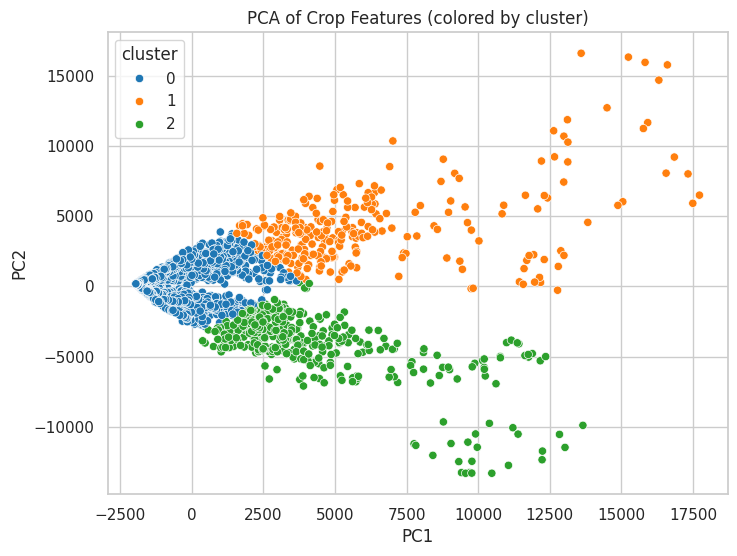

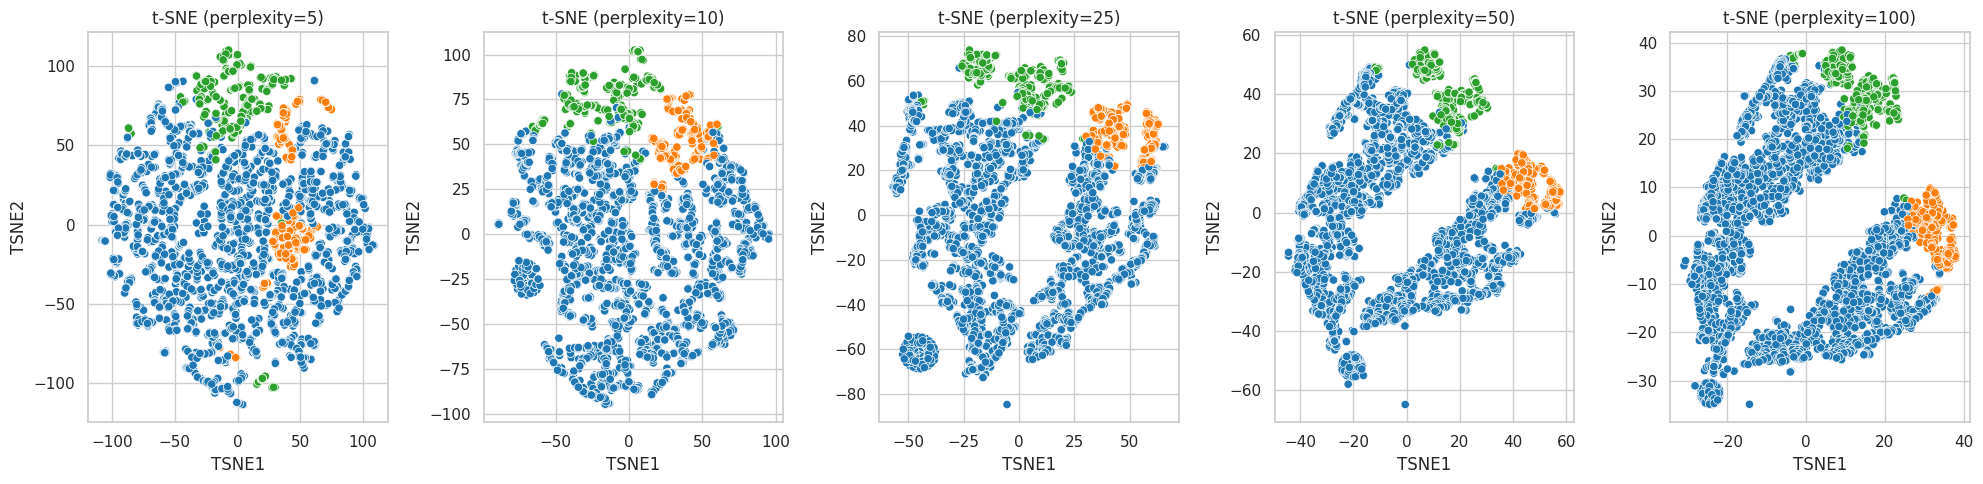

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=crop_pca_df, palette="tab10")
plt.title('PCA of Crop Features (colored by cluster)')
plt.show()

perplexities = [5, 10, 25, 50, 100]
fig, axes = plt.subplots(1, len(perplexities), figsize=(20,5))
for i, p in enumerate(perplexities):
    tsne_df = run_tsne(perplexity=p)
    sns.scatterplot(ax=axes[i], x="TSNE1", y="TSNE2", hue="cluster", data=tsne_df, palette="tab10", legend=False)
    axes[i].set_title(f't-SNE (perplexity={p})')
plt.tight_layout()
plt.show()

## Results
Our dataset is fundamentally continuous rather than categorical, and there is no clear separations into distinct groups. The data varies pretty smoothly across regions and years, and unfortunately dimensionality reduction using PCA and t-SNE, did not provide any meaningful clusters or visually interpretable insights.